In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
wine = pd.read_csv('wine/wine.data', names=['Class', "Alcohol", "Malic_acid", 
									  "Ash", "Alcalinity_of_ash", "Magnesium", 
									  "Phenols", "Flavanoids", "Nonflavanoid_phenols",
									  "Proanthocyanins", "Color_intensity", "Hue", 
                                      "OD280/OD315", "Proline"])
wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X, y = wine.drop(columns=['Class']), wine['Class']
y = y.astype('category')

## X

In [4]:
X.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity_of_ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280/OD315           178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**Нет пропущенных значений**

In [6]:
print(f"размер данных: {X.shape}")

размер данных: (178, 13)


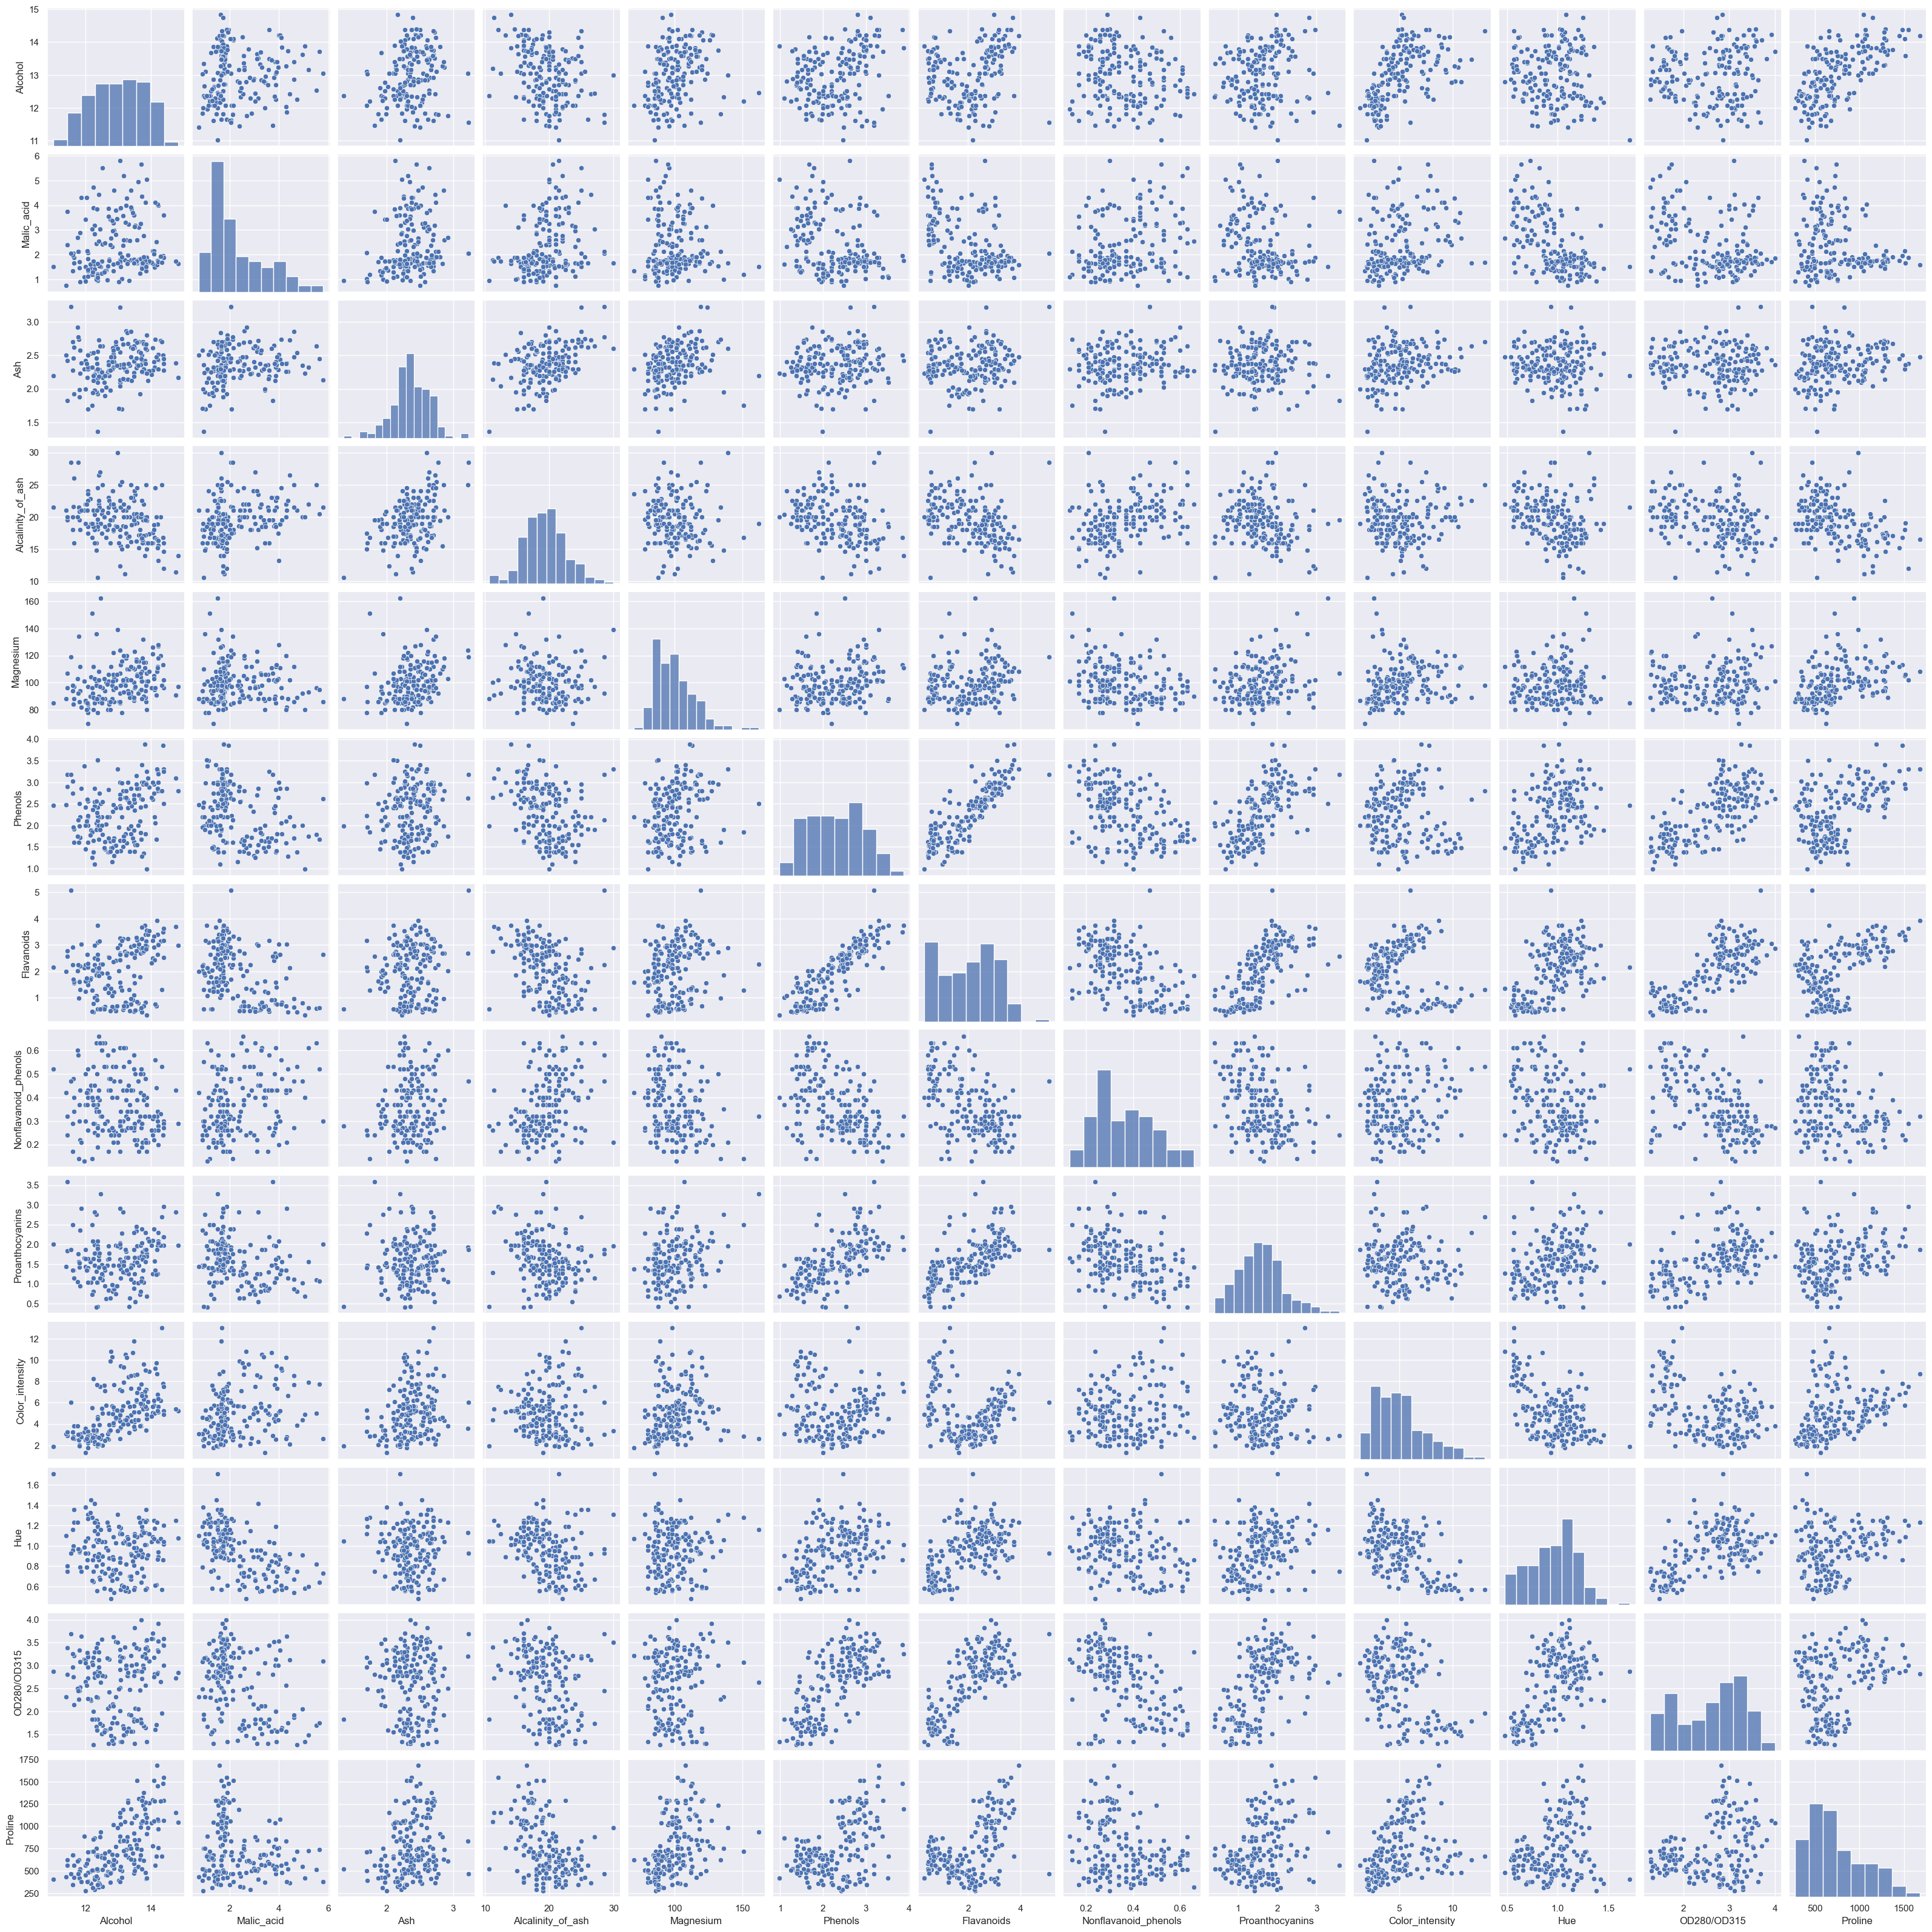

In [7]:
sns.pairplot(X);

Многие переменные выглядят, как нормально распределенные!

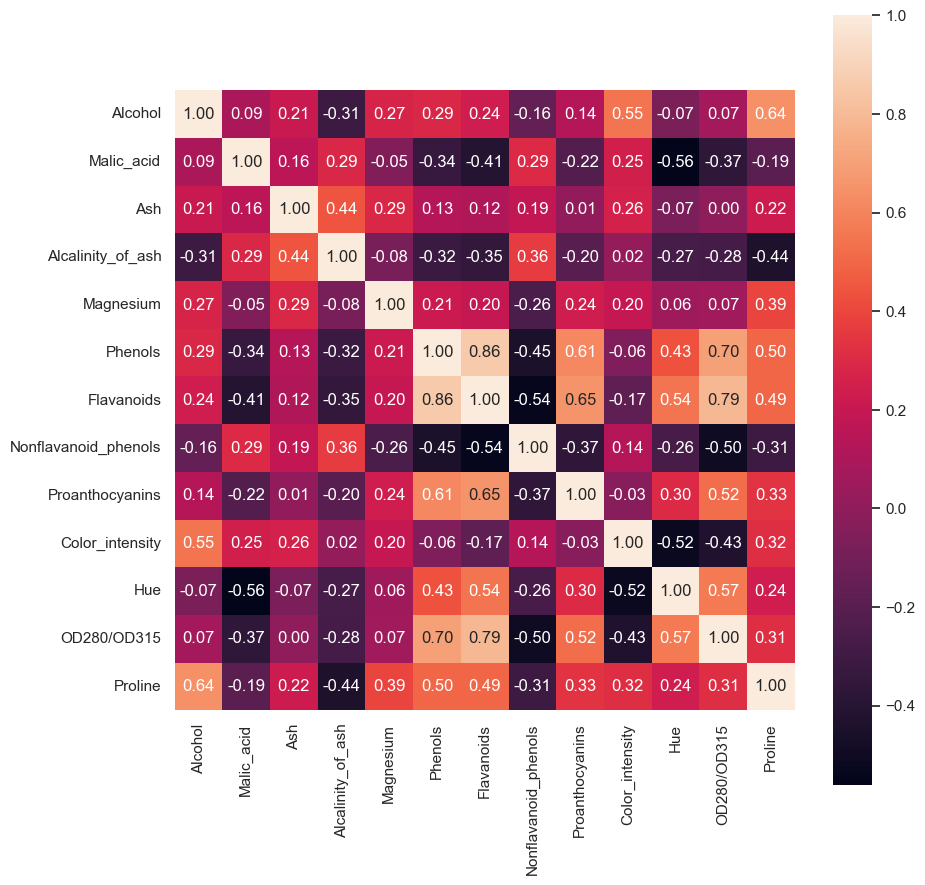

In [8]:
plt.subplots(figsize=(10,10));
sns.heatmap(X.corr(), annot=True, square=True, fmt=".2f");

Мало сильно коррелированных данных, но стоит отметить коррелированность  
- Фенолов с Флаваноидами
- Флаваноидов и фенолов  с Proanthocyanins
- Флаваноидов и фенолов с OD280/OD315
- Оттенок и OD280/OD315

-> Было бы странно, если бы оптическая плотность не коррелировала с оттенком и содержанием в вине определенных веществ.  
-> Proanthocyanins - это класс полифенолов, поэтому все ожидаемо  
-> То же самое с флаваноидами, которые являются классом поли**фенолов**


## y

In [9]:
print(f"Количество сэмплов: {y.shape}")

Количество сэмплов: (178,)


In [10]:
print(f"Пропущенных значений: {y.isna().sum() + y.isnull().sum()}")

Пропущенных значений: 0


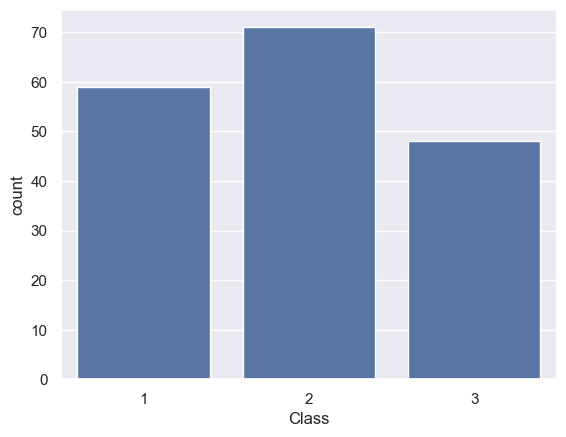

In [11]:
ax = sns.countplot(x=y);

Немного несбалансированные классы

# Decision Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [13]:
в

In [59]:
X_corr = X[['Flavanoids', 'Phenols']]
X_corr_train, X_corr_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.25, random_state=17)

In [60]:
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_corr_train, y_train)
y_corr_pred = dtc.predict(X_corr_test)

In [16]:
def metrics_fun(y_true, y_pred):
    print(f'Accuracy = {accuracy_score(y_true, y_pred)}',
      f'F1 = {f1_score(y_true, y_pred, average="weighted")}',
      f'Precision = {precision_score(y_true, y_pred,  average="weighted")}',
      f'Recall = {recall_score(y_true, y_pred,  average="weighted")}', 
      sep='\n')
    

    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true, y_pred),
                           display_labels=dtc.classes_).plot();
    plt.grid(False)


Accuracy = 0.7333333333333333
F1 = 0.7360802385470318
Precision = 0.7511559696342305
Recall = 0.7333333333333333


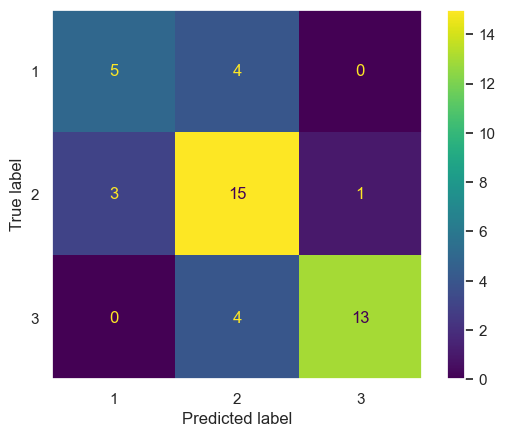

In [61]:
metrics_fun(y_test, y_corr_pred)

In [77]:
X_non_corr = X[['Ash', 'Proanthocyanins']]
X_non_corr_train, X_non_corr_test, y_train, y_test = train_test_split(X_non_corr, y, test_size=0.25, random_state=17)

In [78]:
dtc.fit(X_non_corr_train, y_train)
y_non_corr_pred = dtc.predict(X_non_corr_test)

Accuracy = 0.5777777777777777
F1 = 0.5925255572314397
Precision = 0.6426680073738898
Recall = 0.5777777777777777


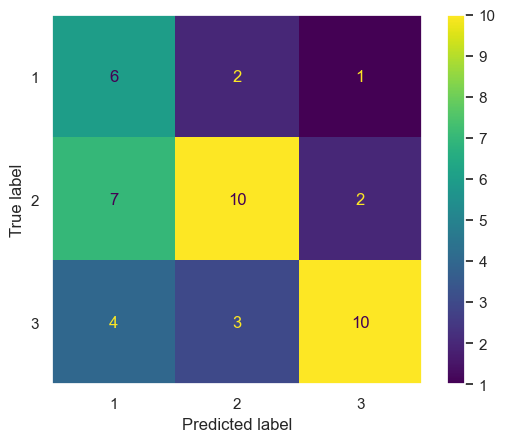

In [79]:
metrics_fun(y_test, y_non_corr_pred)

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

In [102]:
rfc = RandomForestClassifier(random_state=17, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Accuracy = 1.0
F1 = 1.0
Precision = 1.0
Recall = 1.0


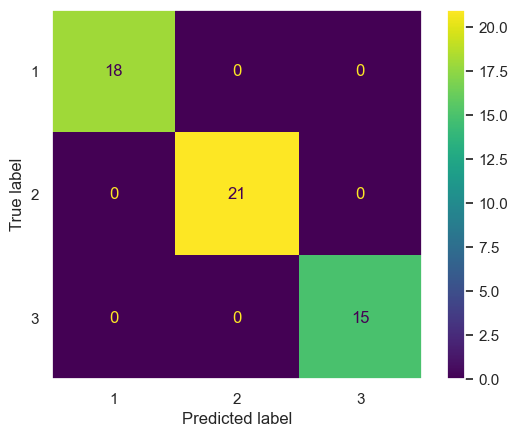

In [103]:
metrics_fun(y_test, y_pred)

**Чтож, модель случайного леса, как и ожидалось, имеет наилучшее качество**

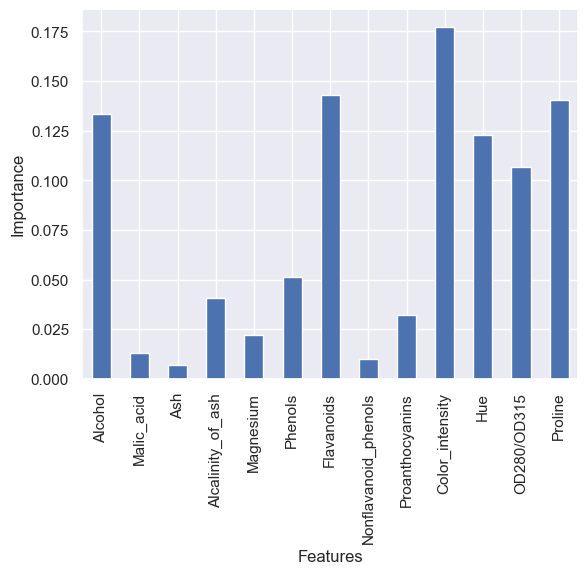

In [130]:
importances = pd.DataFrame(rfc.feature_importances_, index=X.columns)

importances.plot.bar(legend=False);
plt.xlabel("Features");
plt.ylabel("Importance");

Самые важные признаки:
- `Color_intensity`
- `Flavanoids`
- `Proline`
- `Alcohol`

In [133]:
from sklearn.preprocessing import label_binarize

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression

from itertools import cycle


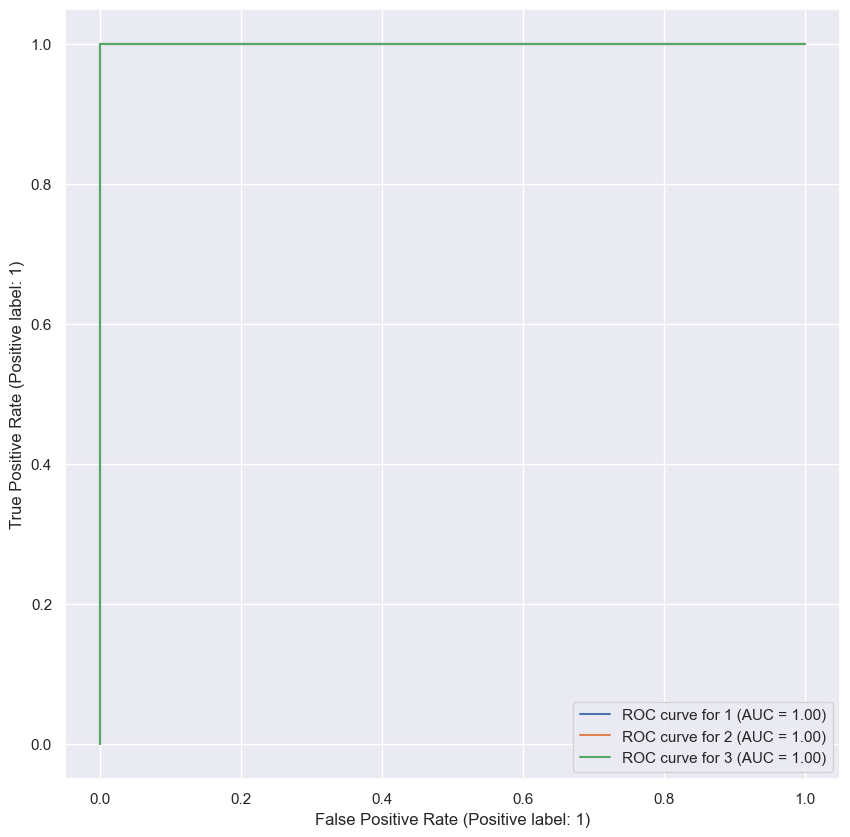

In [150]:
target = label_binarize(y, classes=[1, 2, 3])

train_X, test_X,train_y, test_y = train_test_split(X, target, test_size=0.25, random_state=17)

model = OneVsRestClassifier(RandomForestClassifier()).fit(train_X, train_y)
prob_test = model.predict_proba(test_X)
 
fig, ax = plt.subplots(figsize=(10, 10))
target_names = ['1','2','3']

for class_id in range(3):
    RocCurveDisplay.from_predictions(
        test_y[:, class_id],
        prob_test[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        ax=ax,
    )

**Так как классификация мультиклассовая, то Roc-Curve построена в парадигме "One vs Rest"**